In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('LoanData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


In [10]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median())
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].median())


In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Outliers Detection and Handling

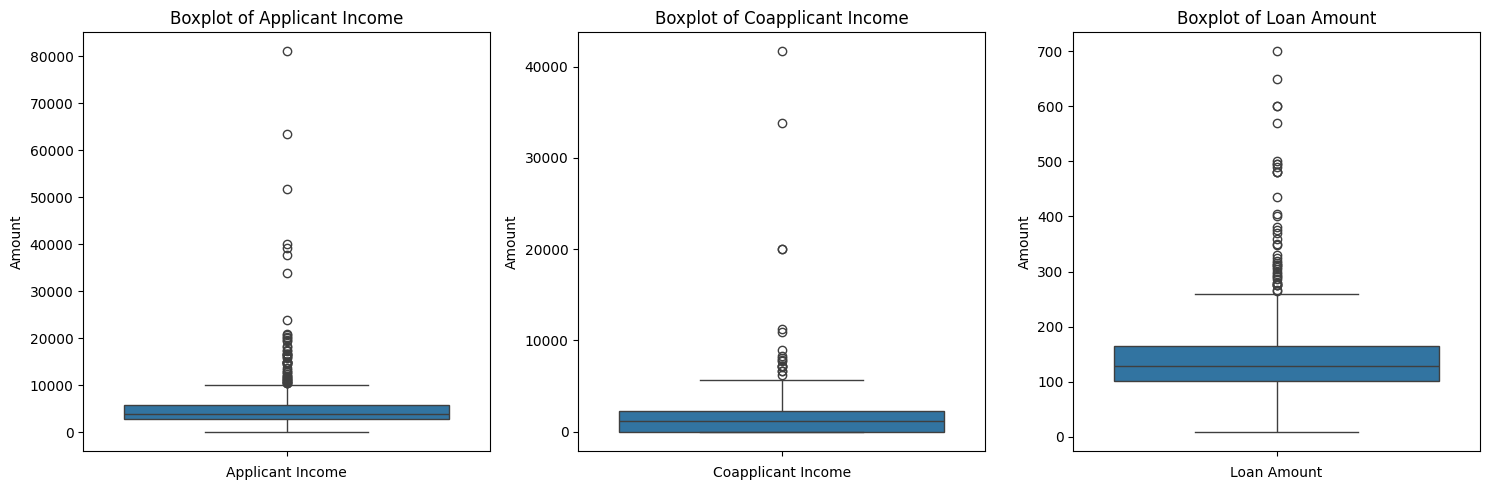

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=None, y=df['ApplicantIncome'])
plt.title('Boxplot of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Amount')

plt.subplot(1, 3, 2)
sns.boxplot(x=None, y=df['CoapplicantIncome'])
plt.title('Boxplot of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Amount')

plt.subplot(1, 3, 3)
sns.boxplot(x=None, y=df['LoanAmount'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

In [13]:
print("Before removing the outliers",df.shape)
df=df[df['ApplicantIncome'] < 25000]
print("After removing the outliers",df.shape)


Before removing the outliers (614, 13)
After removing the outliers (607, 13)


In [14]:
print("Before removing the outliers",df.shape)
df=df[df['CoapplicantIncome'] < 15000]
print("After removing the outliers",df.shape)


Before removing the outliers (607, 13)
After removing the outliers (603, 13)


In [15]:
print("Before removing the outliers",df.shape)
df=df[df['LoanAmount'] < 400]
print("After removing the outliers",df.shape)


Before removing the outliers (603, 13)
After removing the outliers (591, 13)


# Analysis

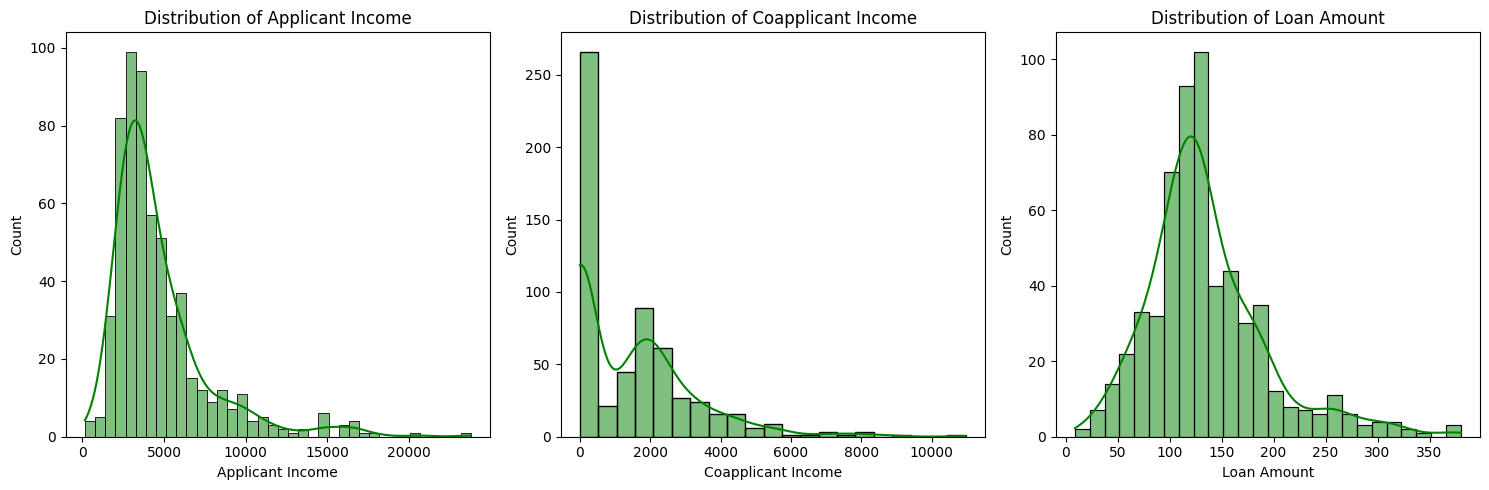

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome'], color='green', kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome'], color='green', kde=True)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount'], color='green', kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [17]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log1p(df['CoapplicantIncome'])


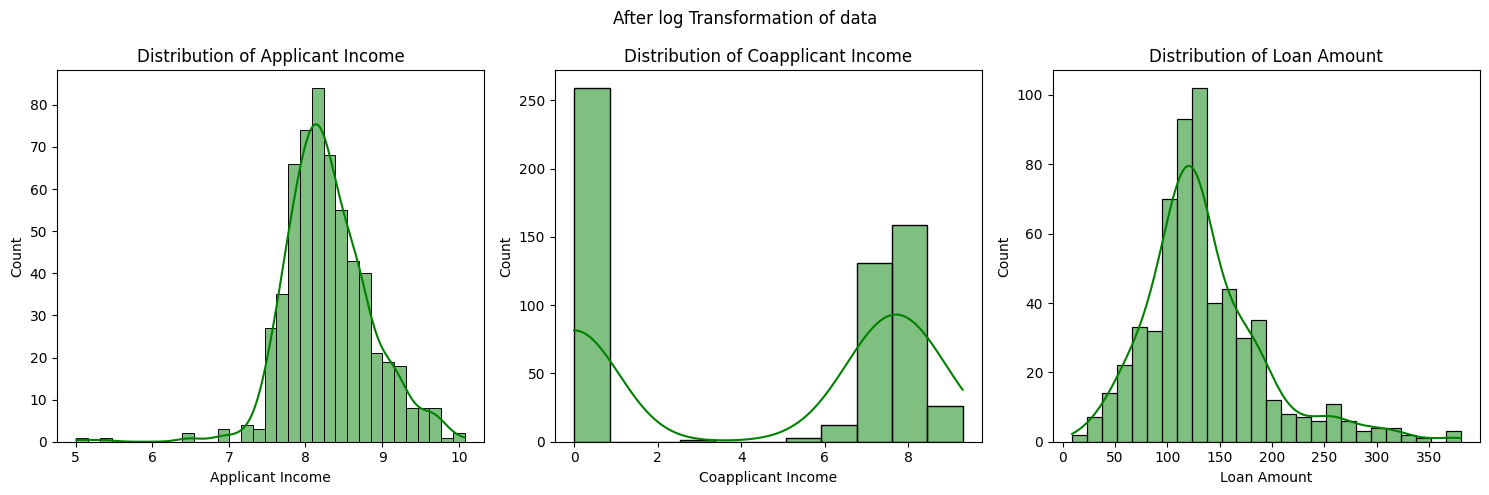

In [18]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['ApplicantIncome'], color='green', kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.histplot(df['CoapplicantIncome'], color='green', kde=True)
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.histplot(df['LoanAmount'], color='green', kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

plt.suptitle("After log Transformation of data")
plt.tight_layout()
plt.show()

In [19]:
# Seperate numerical and categorical data

In [20]:
num = df.select_dtypes('number').columns.tolist()
cat = df.select_dtypes('object').columns.tolist()


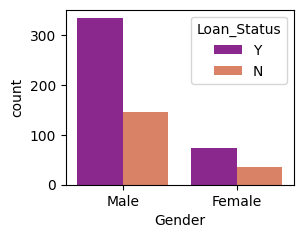

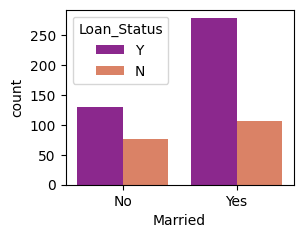

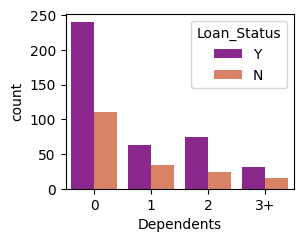

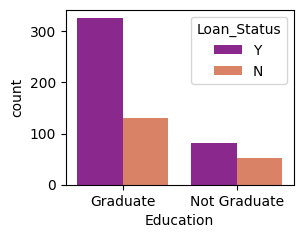

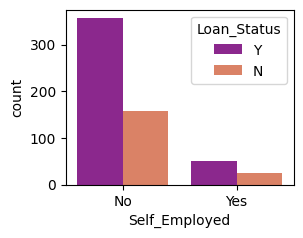

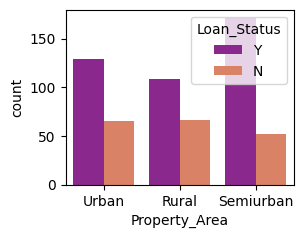

In [21]:
for i in cat[1:-1]:
    plt.figure(figsize=(10,5))
    plt.subplot(2,3,1)
    sns.countplot(x=i,hue='Loan_Status',data=df,palette='plasma')
    plt.xlabel(i)

In [22]:
# plot categorial with target data

print(pd.crosstab(df['Loan_Status'],df['Married']))

Married       No  Yes
Loan_Status          
N             76  107
Y            130  278


In [23]:
print(pd.crosstab(df['Loan_Status'],df['Education']))

Education    Graduate  Not Graduate
Loan_Status                        
N                 131            52
Y                 326            82


# Data preparation

In [24]:
df=df.drop(['Loan_ID'],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,8.430109,7.319202,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,7.856707,7.765993,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,7.972466,0.000000,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,8.320205,0.000000,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8.996157,5.484797,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,8.933664,0.000000,187.0,360.0,1.0,Urban,Y


In [25]:
df.select_dtypes(object).head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y


In [26]:
# Transform categoral data into number

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Dependents'])
df['Self_Employed']=le.fit_transform(df['Dependents'])
df['Property_Area']=le.fit_transform(df['Dependents'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

#or

#df['Gender']=df['Gender'].replace(("Male","Female"),(1,0))
#df['Married']=df['Married'].replace(("Yes","No"),(1,0))


In [32]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

print(X.shape)
print(y.shape)

(591, 11)
(591,)


#### Handle imblance data

In [33]:
from imblearn.over_sampling import SMOTE

X_resample,y_resample=SMOTE().fit_resample(X,y.values.ravel())

print(X_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


### Train Test split

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.2,random_state=42) 

In [42]:
print(X_train.shape)
print(X_test.shape)

(652, 11)
(164, 11)


### Model Building

In [44]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(X_train,y_train)

C:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
y_predict=model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,classification_report

print("Training Accuracy: ",model.score(X_train,y_train))
print("Testing Accuracy: ",model.score(X_test,y_test))

Training Accuracy:  0.7622699386503068
Testing Accuracy:  0.7926829268292683


In [55]:
acc=accuracy_score(y_test,y_predict)
print("Model accracy: ",acc)

Model accracy:  0.7926829268292683


In [54]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.63      0.76        86
           1       0.70      0.97      0.82        78

    accuracy                           0.79       164
   macro avg       0.83      0.80      0.79       164
weighted avg       0.84      0.79      0.79       164



In [59]:
def preprocess_input(user_input):
    input_df = pd.DataFrame([user_input])

    input_df['ApplicantIncome'] = np.log(input_df['ApplicantIncome'])
    input_df['CoapplicantIncome'] = np.log1p(input_df['CoapplicantIncome'])

    le = LabelEncoder()
    input_df['Gender'] = le.fit_transform(input_df['Gender'])
    input_df['Married'] = le.fit_transform(input_df['Married'])
    input_df['Dependents'] = le.fit_transform(input_df['Dependents'])
    input_df['Education'] = le.fit_transform(input_df['Education'])
    input_df['Self_Employed'] = le.fit_transform(input_df['Self_Employed'])
    input_df['Property_Area'] = le.fit_transform(input_df['Property_Area'])

    if 'Loan_ID' in input_df.columns:
        input_df = input_df.drop(['Loan_ID'], axis=1)

    return input_df

def predict_loan_status():
    user_input = {
        'Gender': input("Enter Gender (Male/Female): "),
        'Married': input("Enter Marital Status (Yes/No): "),
        'Dependents': input("Enter Number of Dependents: "),
        'Education': input("Enter Education (Graduate/Not Graduate): "),
        'Self_Employed': input("Are you Self Employed? (Yes/No): "),
        'ApplicantIncome': float(input("Enter Applicant Income: ")),
        'CoapplicantIncome': float(input("Enter Coapplicant Income: ")),
        'LoanAmount': float(input("Enter Loan Amount: ")),
        'Loan_Amount_Term': float(input("Enter Loan Amount Term: ")),
        'Credit_History': float(input("Enter Credit History (0/1): ")),
        'Property_Area': input("Enter Property Area (Urban/Rural/Semiurban): ")
    }

    processed_input = preprocess_input(user_input)

    prediction = model.predict(processed_input)

    if prediction[0] == 1:
        print("Loan Status: Approved")
    else:
        print("Loan Status: Not Approved")

predict_loan_status()

# Male	Yes	1	Graduate	No	4583	1508.0	128.0	360.0	1.0	Rural	N

Enter Gender (Male/Female):  Male
Enter Marital Status (Yes/No):  Yes
Enter Number of Dependents:  1
Enter Education (Graduate/Not Graduate):  Graduate
Are you Self Employed? (Yes/No):  No
Enter Applicant Income:  4583
Enter Coapplicant Income:  1508.0
Enter Loan Amount:  128
Enter Loan Amount Term:  360
Enter Credit History (0/1):  1
Enter Property Area (Urban/Rural/Semiurban):  Rural


Loan Status: Approved
